# Projeto: Análise e Predição de Churn de acordo com o perfil de clientes



<p align="center">
  <img src="telco.jpeg" >
</p>



**Churn é um grande problema para empresas de telecomunicação**. Com concorrência acirrada, adoção de novas (e custosas) tecnologias e altos custos de manutenção manter sua base de clientes é primordial para se manter relevante no mercado. Saber quais clientes podem deixar de assinar seus serviços pode evitar um churn em massa que pode desestabilizar suas operações.


Este projeto usa uma base de dados disponibilizada no [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv) e visa analizar os clientes de uma empresa fictícia de telecom usando as várias técnicas aprendidas no curso de MBA de Data Science and Analytics do PECEGE - USP. 

As técnicas que pretendo usar aqui são:

- Análise Exploratória de Dados
- MCA (Multiple Correspondence Analysis)
- PCA (Principal Components Analysis)
- Modelo Preditivo

Para começar, vamos estudar nossos dados vendo suas características.

Temos uma base de dados com 7043 linhas e 21 colunas distintas:
- Customer ID: Identificação de clientes, todas linhas únicas.
- Gender: Genero biológico da pessoa (Homem ou Mulher)
- SeniorCitizen: Se a pessoa é idosa (0 para não 1 para sim)
- Partner: Se a pessoa tem um parceiro/a (0 para não 1 para sim)
- Dependents: Se a pessoa tem dependentes (Yes or No)
- Tenure: A quantos meses o cliente é assinante
- PhoneService: Se a pessoa tem serviço de telefone ou não (Yes or No)
- Multiple Lines: Se a pessoa tem mais de uma linha (Yes, No or No Phone Service)
- Internet Service: Se a pessoa assina internet (DSL, Fiber Optic, No)
- OnlineSecurity: se ela assina o serviço de segurança online (Yes, No, No internet service)
- OnlineBackup: Se o cliente tem serviço de backup online (Yes, No, No internet service)
- DeviceProtection: Se o cliente tem proteção para seu dispositivo (Yes, No, No internet service)
- TechSupport: Se o cliente assina o suporte técnico (Yes, No, No internet service)
- StreamingTV: Se o cliente assina o serviço de streaming de TV (Yes, No, No internet service)
- StreamingMovies: Se o cliente assina o serviço de streaming de filmes (Yes, No, No internet service)
- Contract: Qual o tipo de contrato o cliente tem (mês a mês, um ano, dois anos)
- Paperless Billing: Se o cliente optou por faturas eletrônicas (Yes or No)
- PaymentMethod: Método de pagamento ('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)')
- MonthCharges: Custos mensais do cliente
- TotalCharges: Custos totais do cliente
- Churn: Se o cliente saiu da empresa ou não, nossa variável alvo

Vamos dar uma olhada no resumo desses dados


In [4]:
import pandas as pd
import csv
import collections, numpy

df = pd.read_csv('churn.csv')

df.head()
#df.describe()
#df['Contract'].unique()
#df['PaymentMethod'].unique()

# A coluna TotalCharges está como string, vou substituir valores nulos ou vazios por 0 e converter para float.
df['TotalCharges'].replace([' ','',' '],0,inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype({'TotalCharges': float})


#print('\nPorcentagem de Homens: %', (df['gender'].value_counts()[0]*100)/df['gender'].count())
#print('\nPorcentagem de Idosos: %', (df['SeniorCitizen'].value_counts()[1]*100)/df['SeniorCitizen'].count())
#print('\nPorcentagem de Pessoas com Parceiros: %', (df['Partner'].value_counts()[1]*100)/df['Partner'].count())
#print('\nPorcentagem de Pessoas com Dependentes: %', (df['Dependents'].value_counts()[1]*100)/df['Dependents'].count())
#print('\nPorcentagem de Churn: %', (df['Churn'].value_counts()[1]*100)/df['Churn'].count())


Não temos linhas sem valores, então não precisamos remediar isso na nossa base de dados.
Vamos ver a distribuição de valores de nossas variáveis por meio de histogramas.

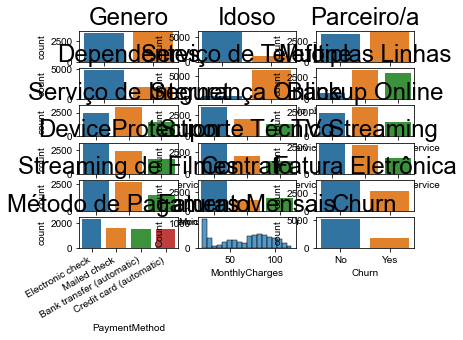

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig , ax = plt.subplots(nrows = 6, ncols = 3)

sns.countplot(data = df, x = 'gender', ax=ax[0][0])
ax[0][0].set_title('Genero',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'SeniorCitizen', ax=ax[0][1])
ax[0][1].set_title('Idoso',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'Partner', ax=ax[0][2])
ax[0][2].set_title('Parceiro/a',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'Dependents', ax=ax[1][0])
ax[1][0].set_title('Dependentes',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'PhoneService', ax=ax[1][1])
ax[1][1].set_title('Serviço de Telefone',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'MultipleLines', ax=ax[1][2])
ax[1][2].set_title('Multiplas Linhas',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'InternetService', ax=ax[2][0])
ax[2][0].set_title('Serviço de Internet',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'OnlineSecurity', ax=ax[2][1])
ax[2][1].set_title('Segurança Online',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'OnlineBackup', ax=ax[2][2])
ax[2][2].set_title('Backup Online',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'DeviceProtection', ax=ax[3][0])
ax[3][0].set_title('DeviceProtection',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'TechSupport', ax=ax[3][1])
ax[3][1].set_title('Suporte Técnico',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'StreamingTV', ax=ax[3][2])
ax[3][2].set_title('TV Streaming',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'StreamingMovies', ax=ax[4][0])
ax[4][0].set_title('Streaming de Filmes',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'Contract', ax=ax[4][1])
ax[4][1].set_title('Contrato',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'PaperlessBilling', ax=ax[4][2])
ax[4][2].set_title('Fatura Eletrônica',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'PaymentMethod', ax=ax[5][0])
labels = df['PaymentMethod'].unique()
ax[5][0].set_title('Método de Pagamento',fontdict= {'fontsize': 24})
ax[5][0].set_xticklabels(labels,rotation=30, ha= 'right')
sns.histplot(data = df, x = 'MonthlyCharges', ax=ax[5][1])
ax[5][1].set_title('Faturas Mensais',fontdict= {'fontsize': 24})
sns.countplot(data = df, x = 'Churn', ax=ax[5][2])
ax[5][2].set_title('Churn',fontdict= {'fontsize': 24})

sns.set(rc={'figure.figsize':(20,30)})

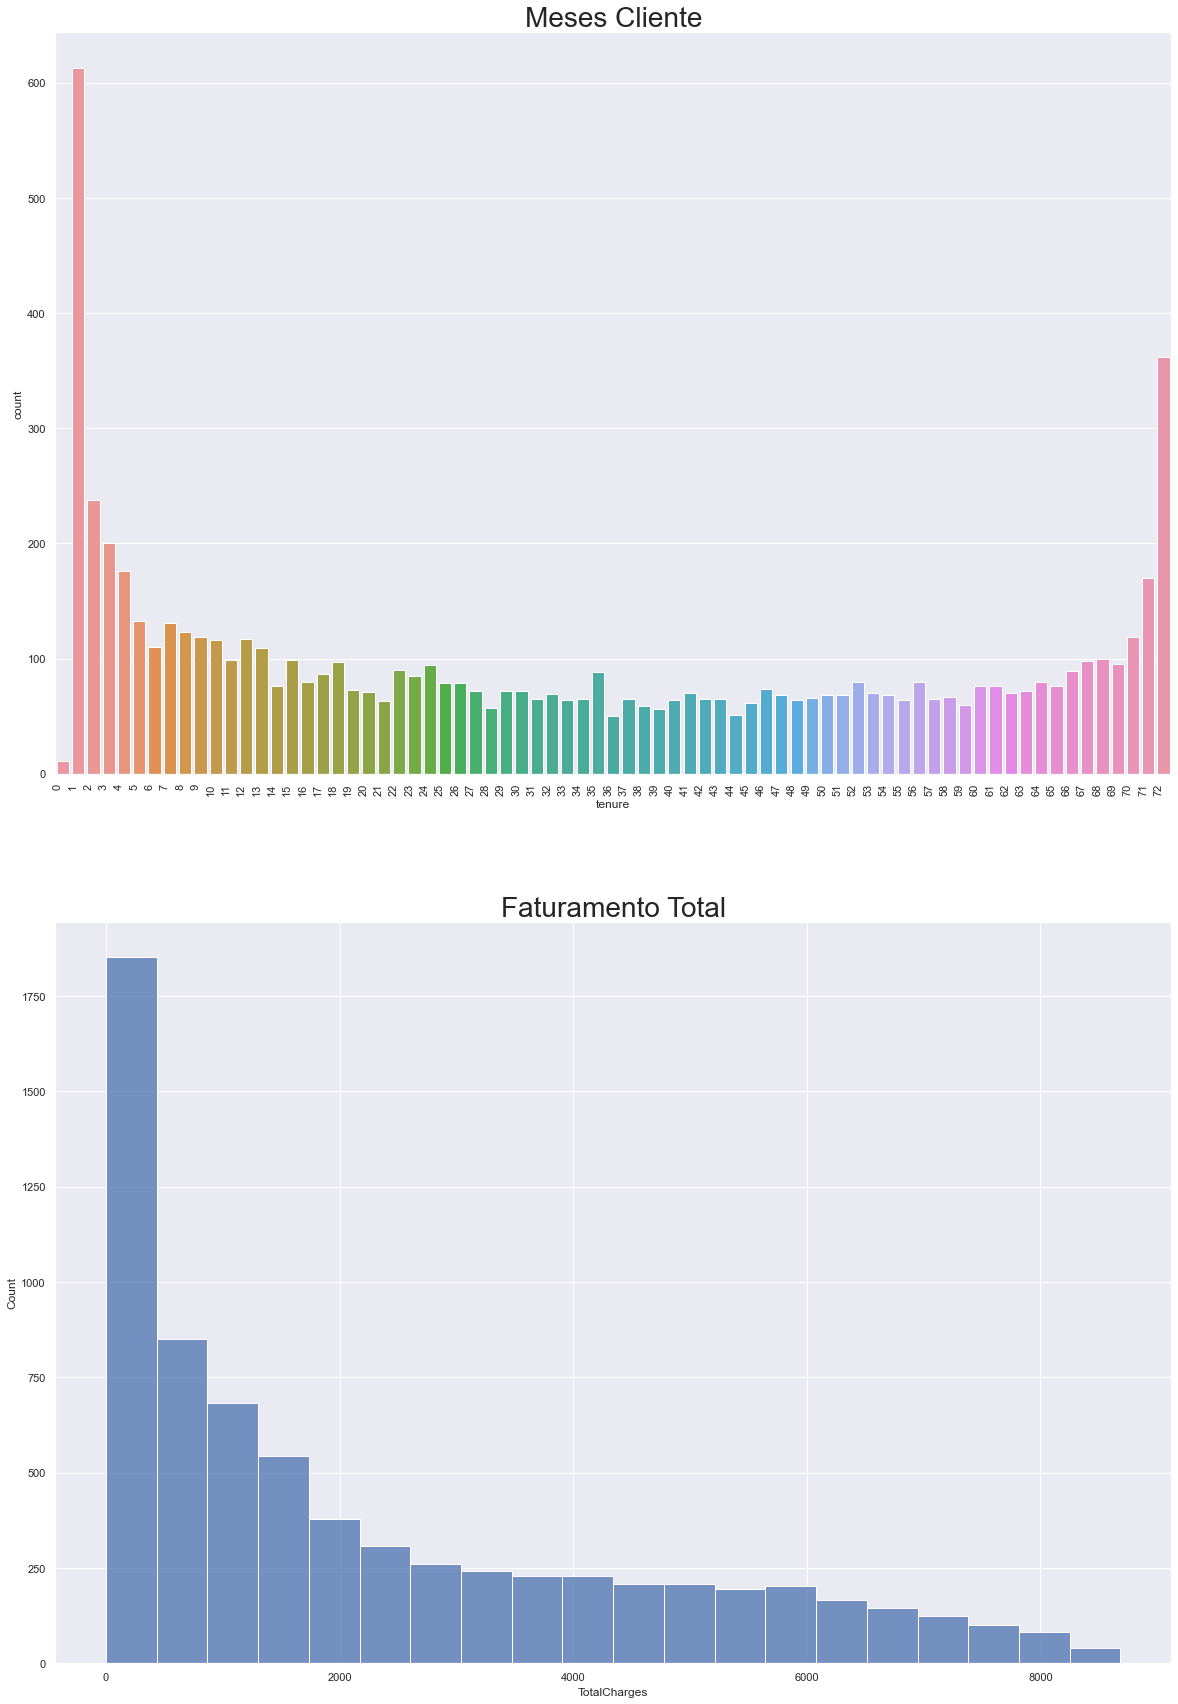

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.sort_values(['tenure']).reset_index(drop=True)

fig , ax = plt.subplots(nrows = 2, ncols = 1)
sns.countplot(data = df, x = 'tenure', ax=ax[0])
ax[0].set_title('Meses Cliente',fontdict= {'fontsize': 28})
sns.histplot(data = df, x = 'TotalCharges', ax=ax[1], bins = 20)
ax[1].set_title('Faturamento Total',fontdict= {'fontsize': 28})

labels = df['tenure'].unique()
ax[0].set_xticklabels(labels,rotation = 90, ha= 'right')


sns.set(rc={'figure.figsize':(50,35)},font_scale=2)

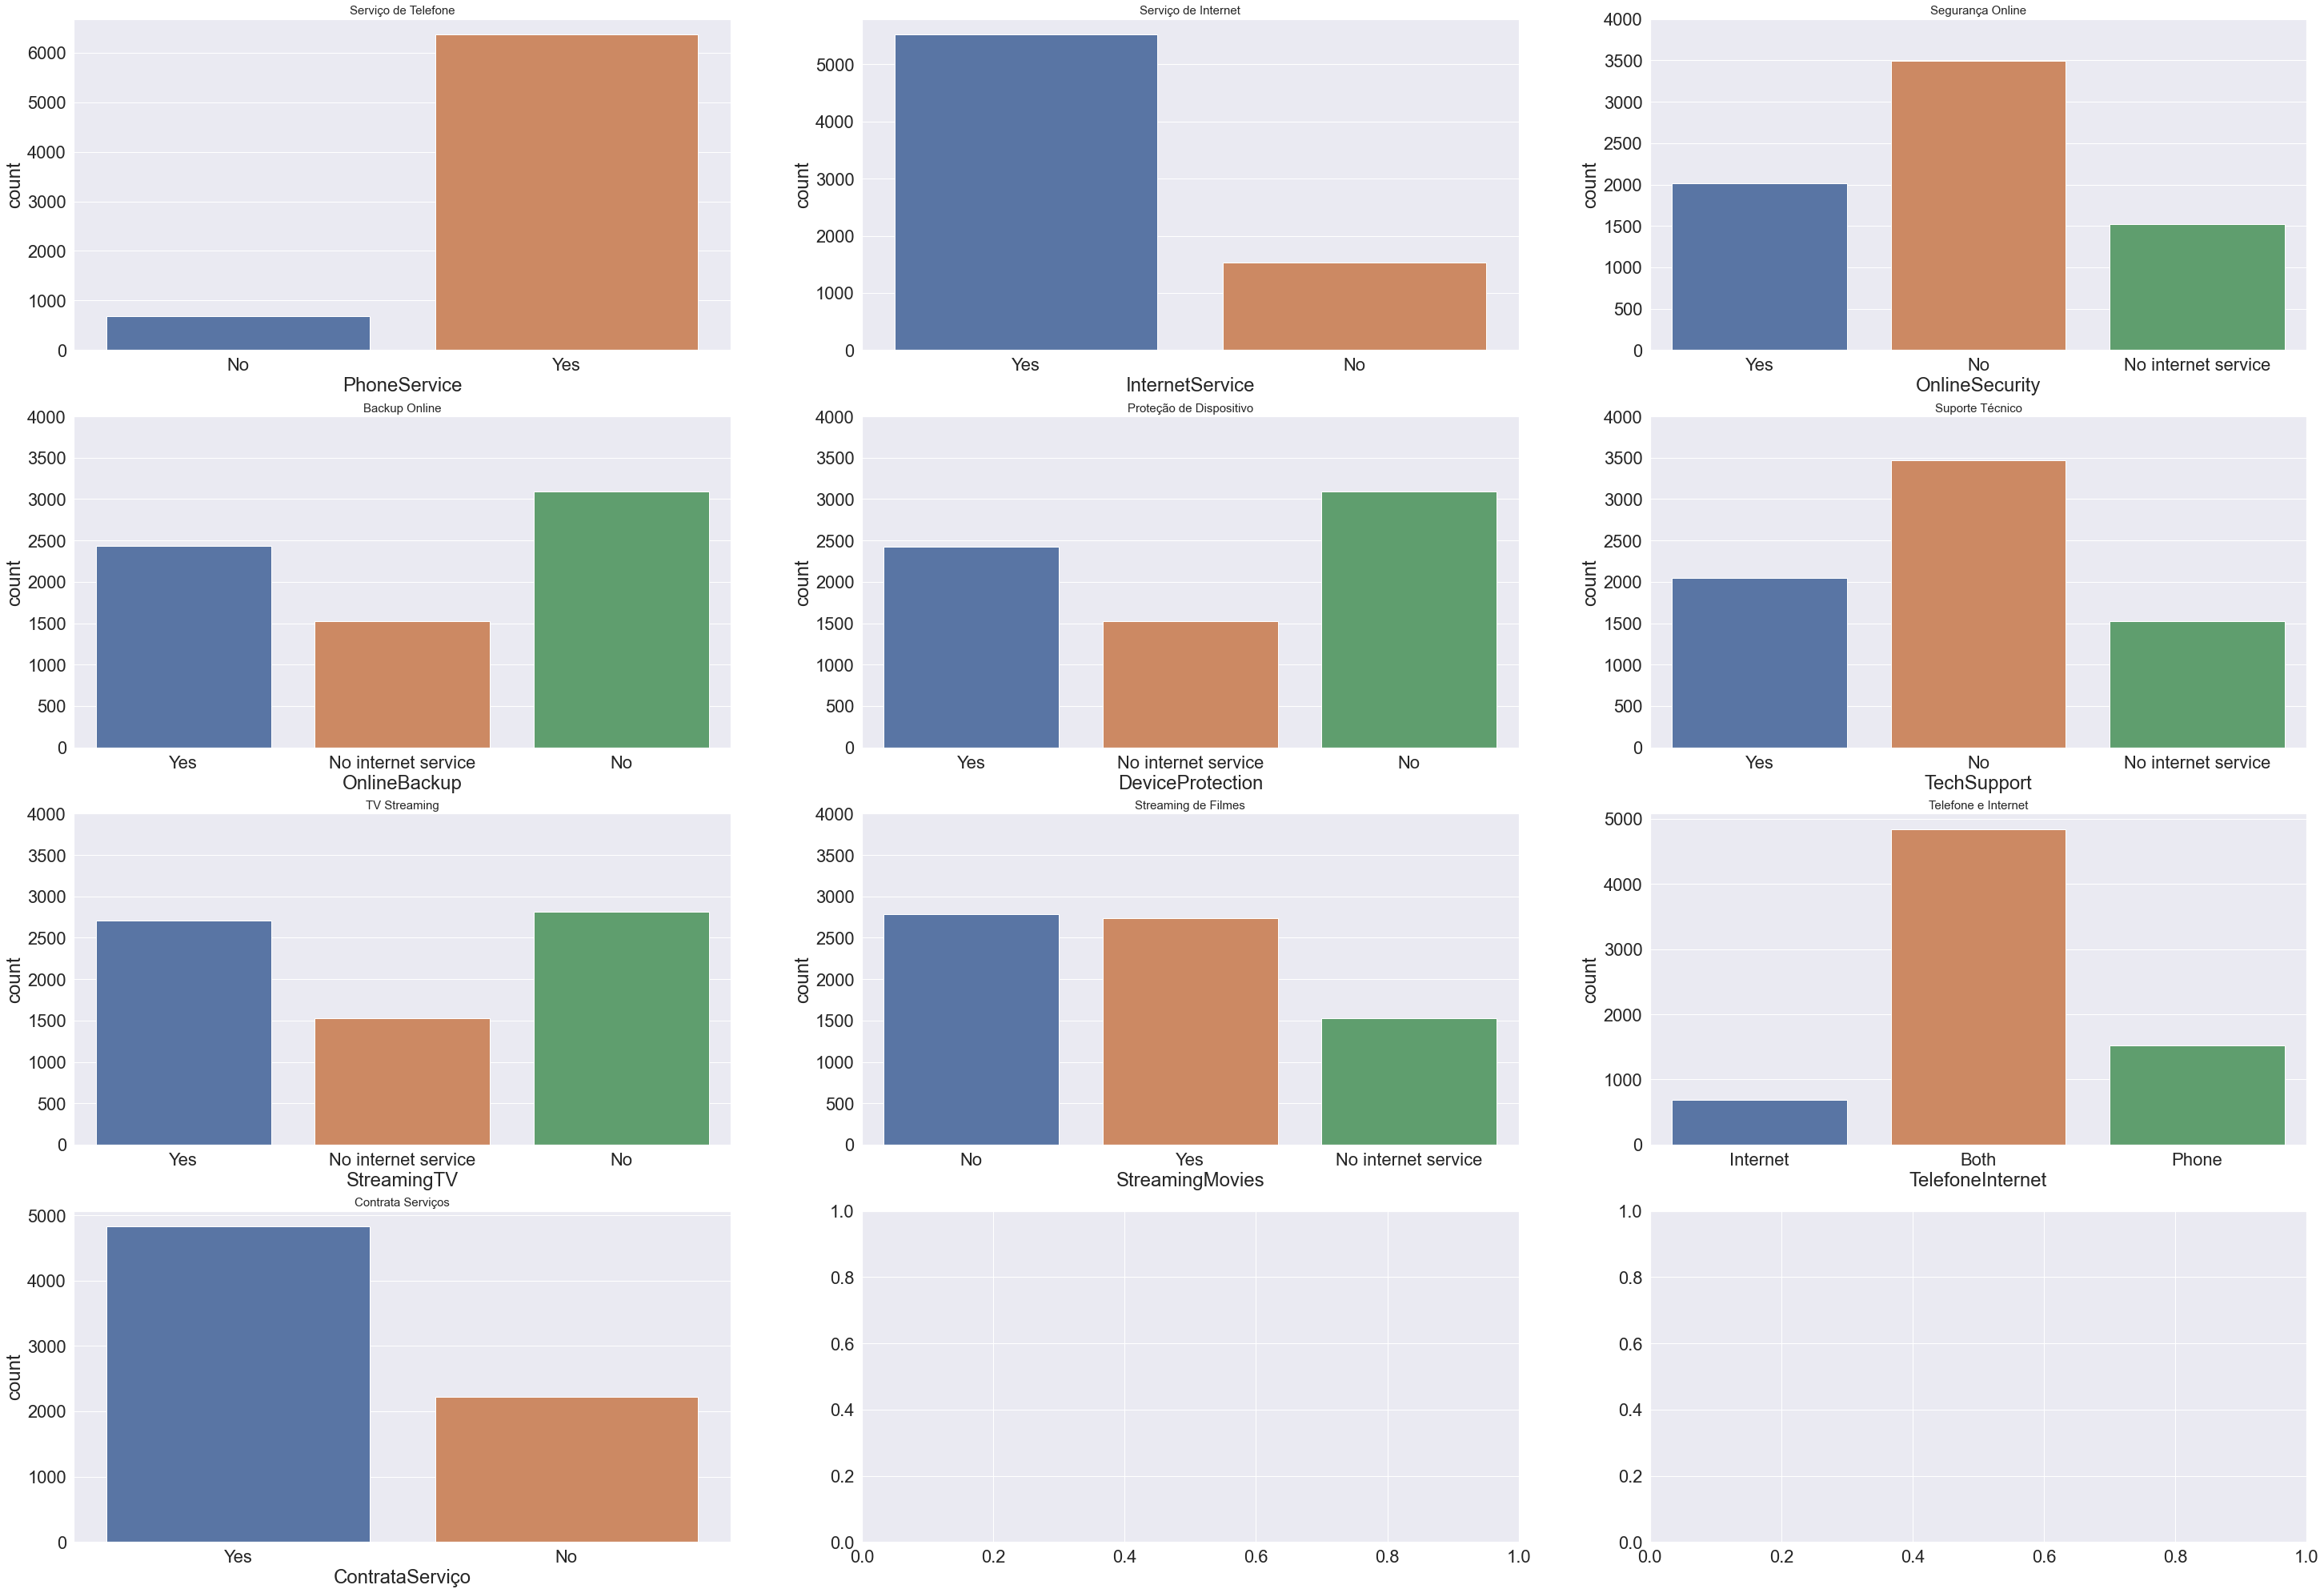

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

produtos = df.copy(deep=True)
produtos = produtos.replace(['DSL','Fiber optic'],'Yes')

def internet_e_telefone(row):
    if row['InternetService'] == 'Yes' and row['PhoneService'] == 'Yes':
        val = 'Both'
    if row['InternetService'] == 'No' and row['PhoneService'] == 'Yes':
        val = 'Phone'
    if row['InternetService'] == 'Yes' and row['PhoneService'] == 'No':
        val = 'Internet'
    return val

def servico_extra(row):
    val = 'No'
    if row['OnlineSecurity'] == 'Yes' or row['OnlineBackup'] == 'Yes' or row['DeviceProtection'] == 'Yes' or row['TechSupport'] == 'Yes' or row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes':
        val = 'Yes'
    return val


produtos['TelefoneInternet'] = produtos.apply(internet_e_telefone,axis=1)
produtos['ContrataServiço'] = produtos.apply(servico_extra,axis=1)


fig , ax = plt.subplots(nrows = 4, ncols = 3)
font_size = 15
sns.countplot(data = produtos, x = 'PhoneService', ax=ax[0][0])
ax[0][0].set_title('Serviço de Telefone',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'InternetService', ax=ax[0][1])
ax[0][1].set_title('Serviço de Internet',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'OnlineSecurity', ax=ax[0][2])
ax[0][2].set_title('Segurança Online',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'OnlineBackup', ax=ax[1][0])
ax[1][0].set_title('Backup Online',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'DeviceProtection', ax=ax[1][1])
ax[1][1].set_title('Proteção de Dispositivo',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'TechSupport', ax=ax[1][2])
ax[1][2].set_title('Suporte Técnico',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'StreamingTV', ax=ax[2][0])
ax[2][0].set_title('TV Streaming',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'StreamingMovies', ax=ax[2][1])
ax[2][1].set_title('Streaming de Filmes',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'TelefoneInternet', ax=ax[2][2])
ax[2][2].set_title('Telefone e Internet',fontdict= {'fontsize': font_size})
sns.countplot(data = produtos, x = 'ContrataServiço', ax=ax[3][0])
ax[3][0].set_title('Contrata Serviços',fontdict= {'fontsize': font_size})


ax[0][2].set_ylim(bottom = 0, top = 4000)
ax[1][0].set_ylim(bottom = 0, top = 4000)
ax[1][1].set_ylim(bottom = 0, top = 4000)
ax[1][2].set_ylim(bottom = 0, top = 4000)
ax[2][0].set_ylim(bottom = 0, top = 4000)
ax[2][1].set_ylim(bottom = 0, top = 4000)


sns.set(rc={'figure.figsize':(20,15)})

Temos muitos dados interessantes em nossa base! É possível tirar vários insights!


Para melhor organizar as idéias, vamos usar bullet points:
- Os assinantes do serviço são homens, porém com uma pequena margem de vantagem (50,48% de homens);
- Uma pequena parcela dos assinantes são idosos (16%);
- Quase metade dos assinantes tem parceiros (48%);
- Os assinantes com dependentes fazem 30% da base de clientes.
- O serviço de telefonia é o produto mais popular;
- A maioria das pessoas assina a internet e o serviço de telefonia simultâneamente;
- Dos que contratam o serviço de Internet, a grande maioria contrata serviços adicionais como Streaming, Backup Online, etc...
- O serviço mais popular é o de Streaming de TV e Filmes e o menos popular é o de Segurança Online;
- Pelo gráfico de __tenure__ podemos ver que a maioria dos clientes da empresa são recém chegados ou já assinam seus produtos a mais de 71 meses;
- Tivemos um Churn de **26%** neste mês, ou seja, 1/4 de nossa base de clientes foi embora em um mês!!


Nessa próxima parte vamos analisar qual a porcentagem de churn para cada grupo de clientes.

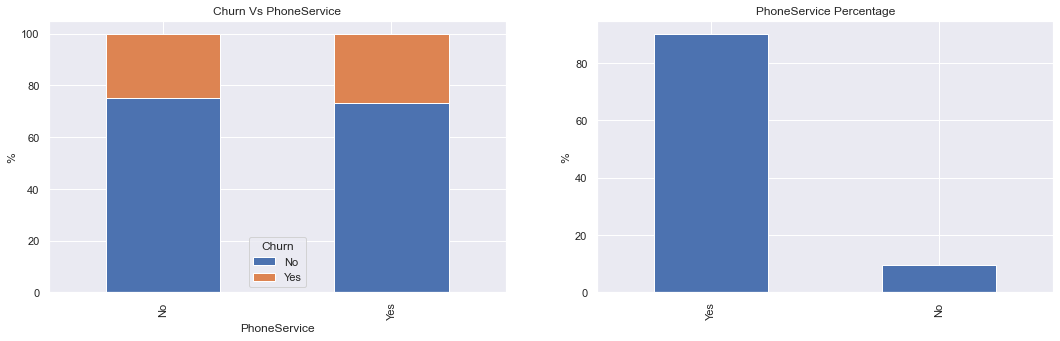

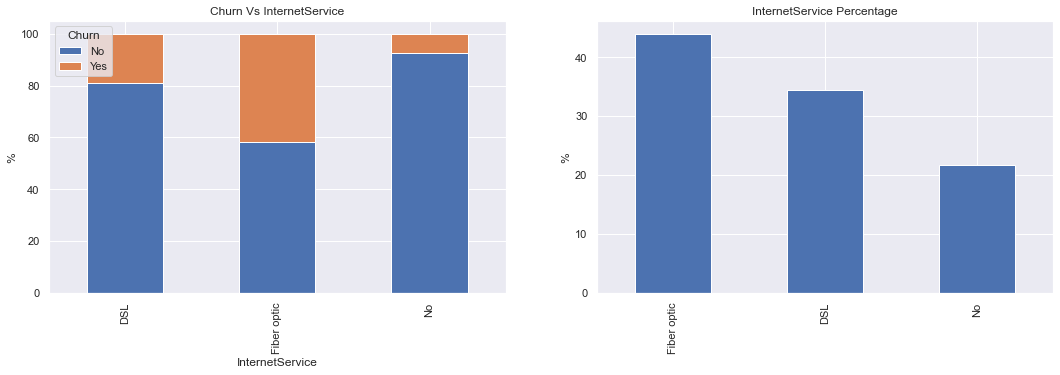

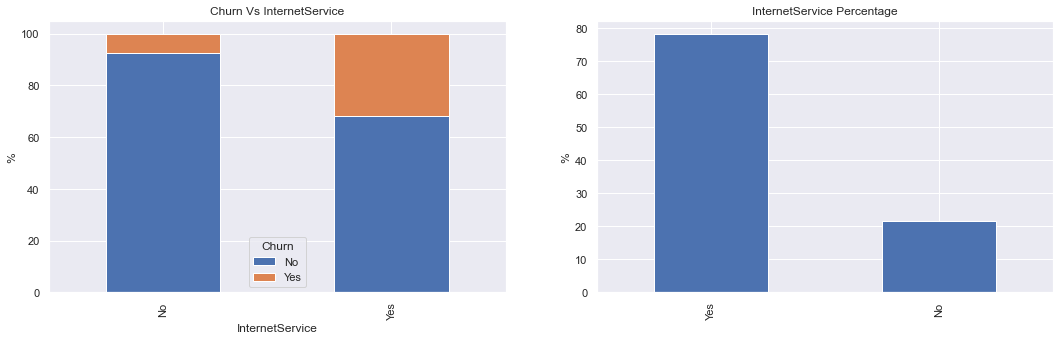

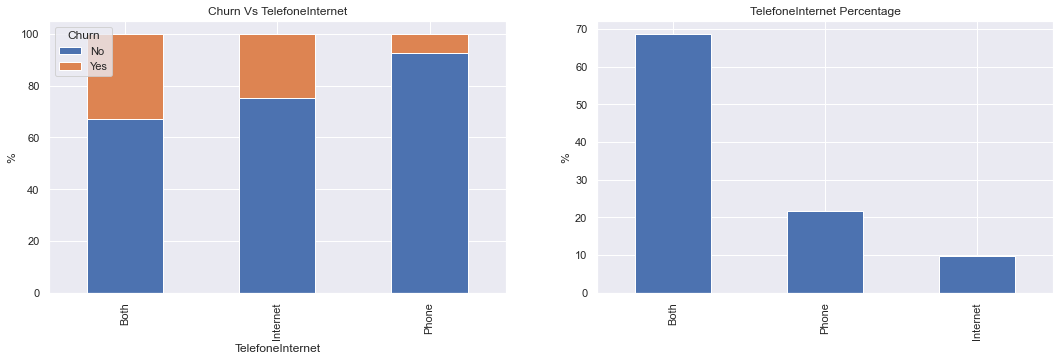

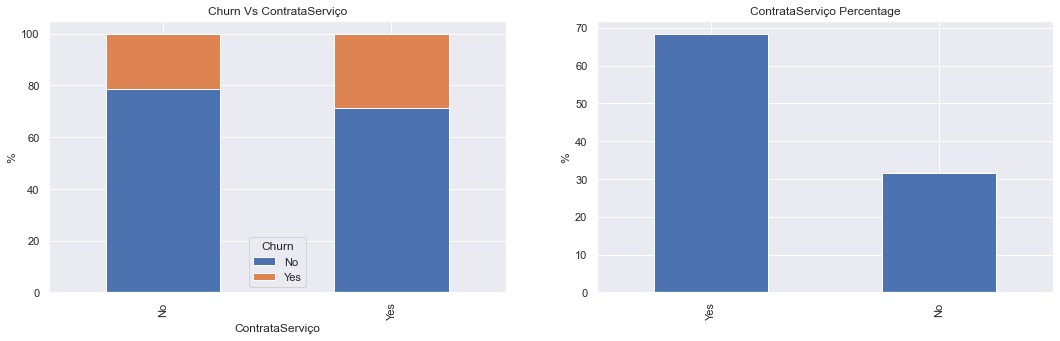

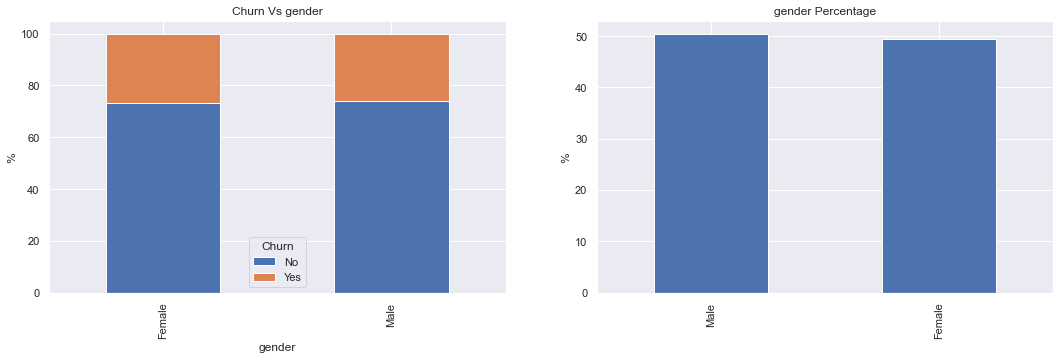

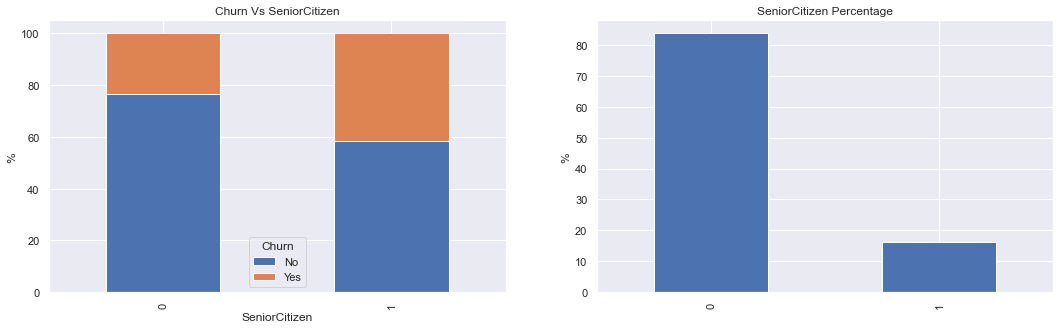

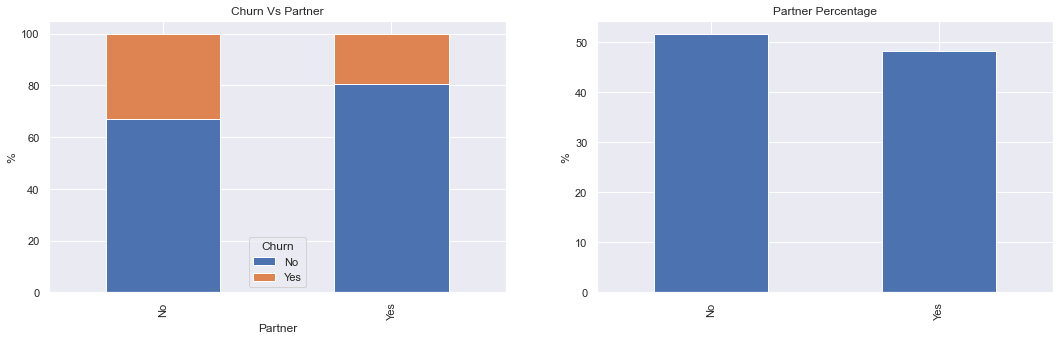

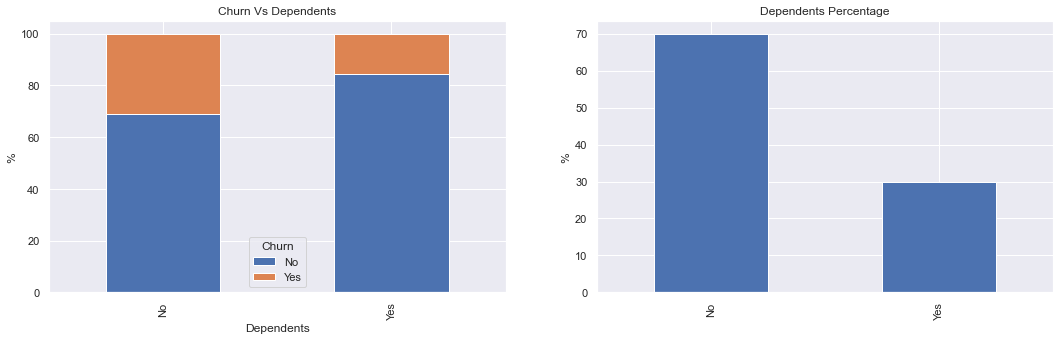

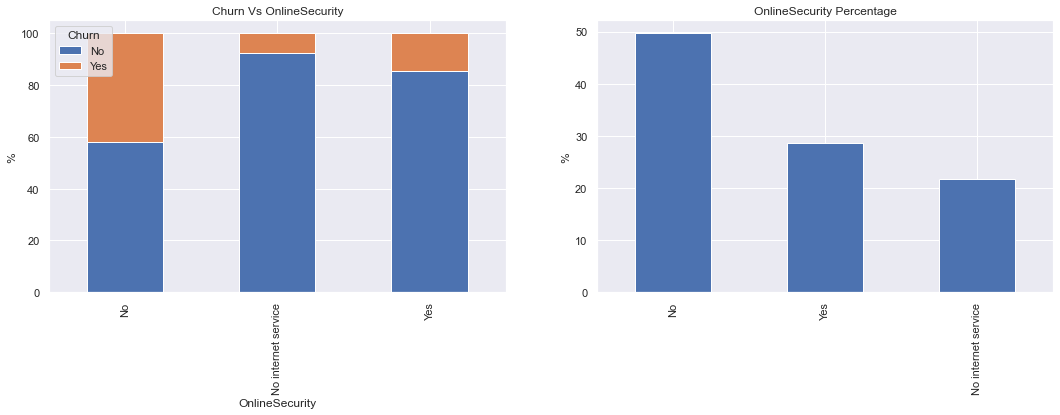

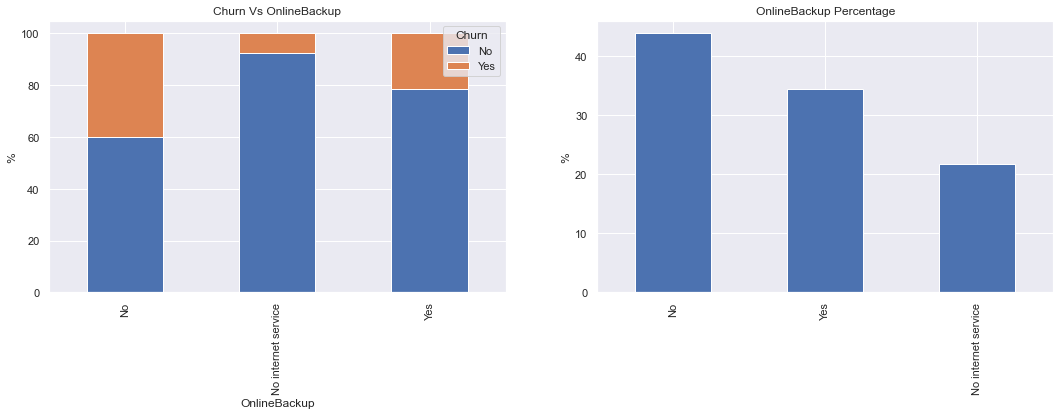

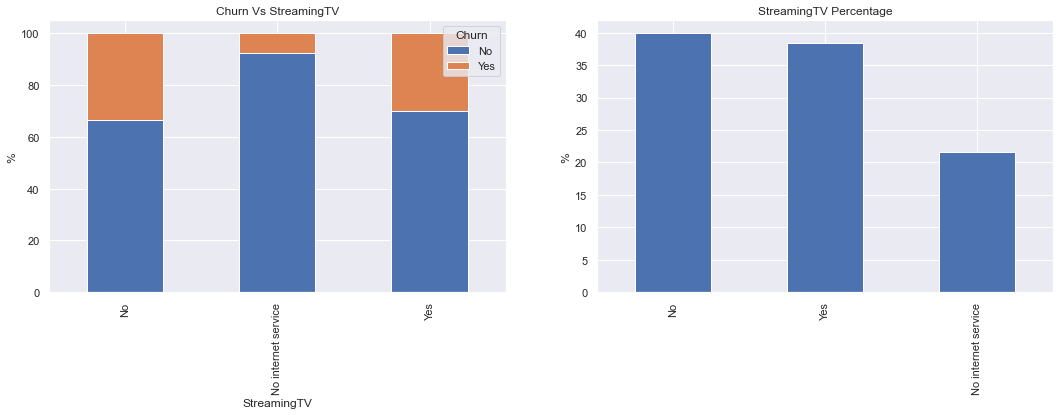

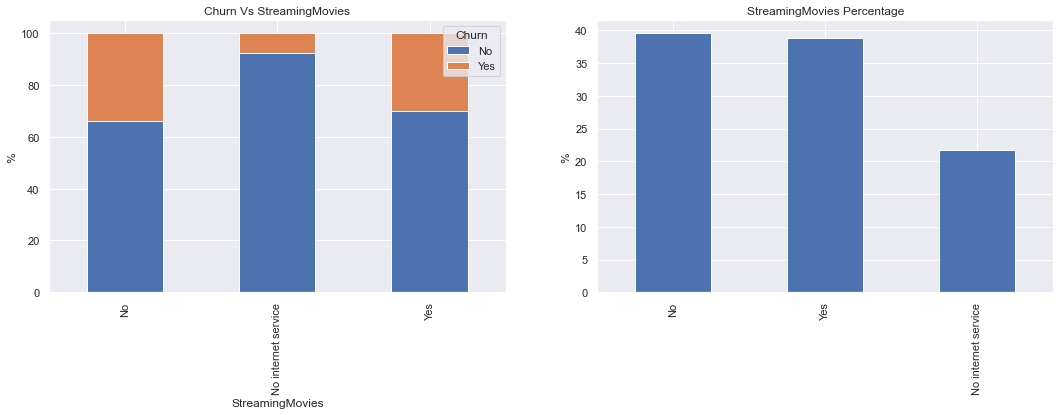

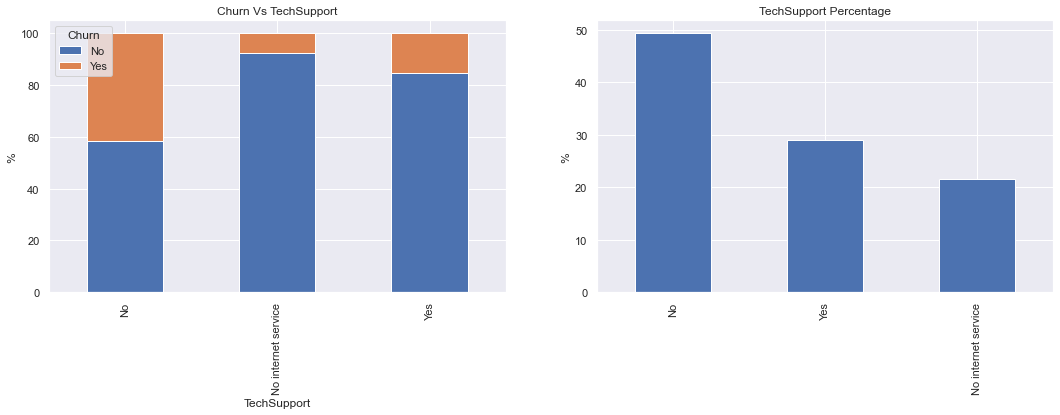

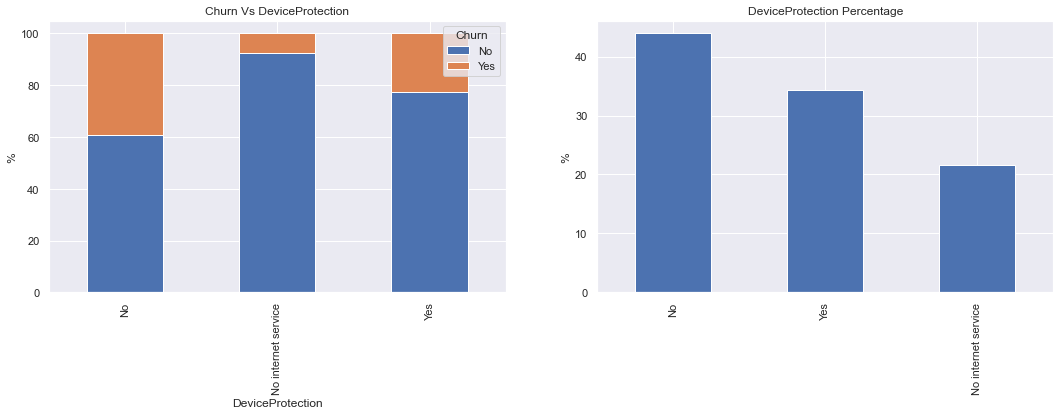

In [8]:
#Função para plotar gráficos Churn vs Coluna
def plot_churn(df,column):
    fig, ax = plt.subplots(1,2, figsize=(20,20))
    tmp1 = pd.crosstab(index = df[column], columns = df['Churn'], values = df['Churn'],
                               aggfunc = len,
                               normalize = 'index').mul(100)

    tmp2 = df[column].value_counts(normalize=True).mul(100)
    tmp1.plot.bar(stacked=True,figsize=(18,5),ax=ax[0], ylabel='%')
    tmp2.plot.bar(stacked=True,figsize=(18,5),ax=ax[1], ylabel='%')
    ax[1].set_title('{} Percentage'.format(column))
    ax[0].set_title('Churn Vs {}'.format(column))
    



#Churn por serviços
plot_churn(produtos,'PhoneService')
#Churn por Tipo de Serviço de Internet
plot_churn(df,'InternetService')
#Churn por serviço de internet
plot_churn(produtos,'InternetService')
#Churn por Tipo de Serviço de Internet
plot_churn(produtos,'TelefoneInternet')
#Churn por cliente que contrata servios de internet extras
plot_churn(produtos,'ContrataServiço')
#Churn por genêro
plot_churn(produtos,'gender')
#Churn por faixa de idade
plot_churn(produtos,'SeniorCitizen')
#Churn por situação marital
plot_churn(produtos,'Partner')
#Churn por dependentes
plot_churn(produtos,'Dependents')
#Churn por contratante de segurança online
plot_churn(produtos,'OnlineSecurity')
#Churn por contratante de backup online
plot_churn(produtos,'OnlineBackup')
#Churn por contratante de backup online
plot_churn(produtos,'StreamingTV')
#Churn por contratante de backup online
plot_churn(produtos,'StreamingMovies')
#Churn por contratante de backup online
plot_churn(produtos,'TechSupport')
#Churn por contratante de backup online
plot_churn(produtos,'DeviceProtection')


Novamente é possível de observar tendências bem interessantes no dados:

- Pessoas que contratam serviços de Internet extra tem uma taxa bem menor de Churn;
- Entre os assinantes de serviços de internet, os que mais deram churn foram os assinantes de Fibra Ótica;
- Clientes que só tem o serviço de telefone tem churn menor que clientes que tem ambos Telefone e Internet;
- O Churn é ligeiramente menor para assinantes de streamming TV e Filmes;
- O Churn é bem menor para clientes que assinam Suporte Tecnico e Segurança Online;
- Pessoas sem dependentes tem churn maior que as com dependentes.

Vamos fazer agora uma ACM (Análise de Componentes Múltiplas) de nossas variáveis categóricas.


O uso da ACM neste caso vai nos mostrar as associações entre as variáveis categóricas da base de dados. Estamos interessados em ver quais das variáveis se associa mais a churn.

## MCA


Para nossa MCA iremos usar somente as variáveis qualitativas, são estas:

- Gender: Genero biológico da pessoa (Homem ou Mulher)
- SeniorCitizen: Se a pessoa é idosa (0 para não 1 para sim)
- Partner: Se a pessoa tem um parceiro/a (0 para não 1 para sim)
- Dependents: Se a pessoa tem dependentes (Yes or No)
- PhoneService: Se a pessoa tem serviço de telefone ou não (Yes or No)
- Multiple Lines: Se a pessoa tem mais de uma linha (Yes, No or No Phone Service)
- Internet Service: Se a pessoa assina internet (DSL, Fiber Optic, No)
- OnlineSecurity: se ela assina o serviço de segurança online (Yes, No, No internet service)
- OnlineBackup: Se o cliente tem serviço de backup online (Yes, No, No internet service)
- DeviceProtection: Se o cliente tem proteção para seu dispositivo (Yes, No, No internet service)
- TechSupport: Se o cliente assina o suporte técnico (Yes, No, No internet service)
- StreamingTV: Se o cliente assina o serviço de streaming de TV (Yes, No, No internet service)
- StreamingMovies: Se o cliente assina o serviço de streaming de filmes (Yes, No, No internet service)
- Contract: Qual o tipo de contrato o cliente tem (mês a mês, um ano, dois anos)
- Paperless Billing: Se o cliente optou por faturas eletrônicas (Yes or No)
- PaymentMethod: Método de pagamento ('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)')
- Churn: Se o cliente saiu da empresa ou não, nossa variável alvo


Antes de fazermos nossa MCA precisamos ver se nossa base de dados permite o uso da técnica.
Vamos fazer o teste qui2 (Qui Quadrado) entre todas as variáveis qualitativas da nossa base para verificar se as variáveis categoricas se associam de forma aleatória, rejeitando a hipotese nula.

Vou fazer um novo DataFrame com somente as variáveis qualitativas e fazer o teste qui2 entre todas as colunas.



In [55]:
import scipy
from scipy.stats import chi2_contingency


df_quali = df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']].copy()

colunas = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
tabelas = []
indexes = []
p_value_ok = []
for i in colunas:
    if i != 'Churn':
        tabelas.append( pd.crosstab(index=df_quali[i], 
        columns=df_quali['Churn']) )
    indexes.append([i,j])

for i in range(len(tabelas)):
    if chi2_contingency(tabelas[i])[1] <= 0.05:
        p_value_ok.append(True)
    else:
        p_value_ok.append(False)
print(chi2_contingency(tabelas[0])[1])
print(p_value_ok)

 

0.48657873605618596
[False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True]


A unica tabela de contingência que não passou no nosso teste Qui2 foi a de genêroXchurn. Estes dados estarão de fora de nossa análise.
Todas as outras tabelas rejeitaram a hipotese nulas, sendo assim estas não se relacionam de forma aleatória.
Vamos prosseguir para nosso MCA.

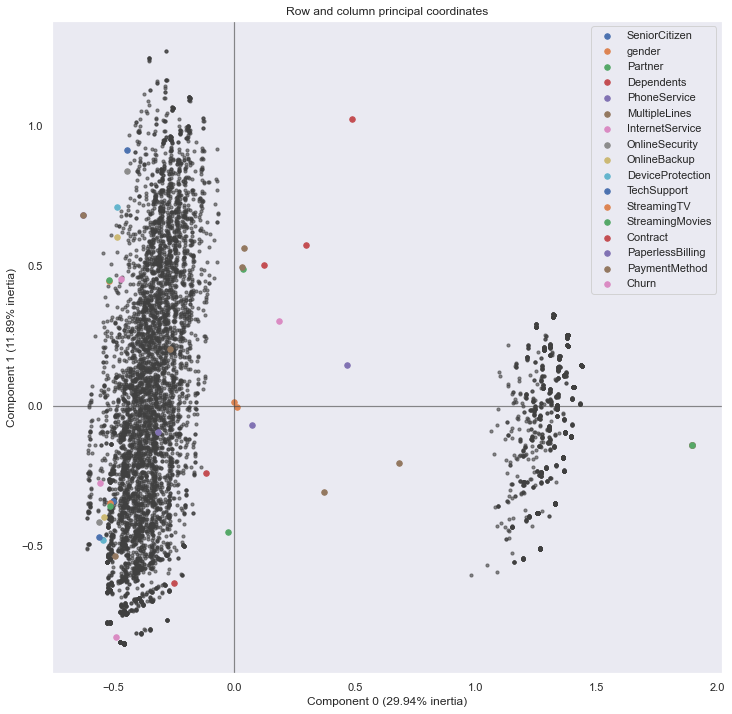

In [75]:
import prince
import matplotlib

mca = prince.MCA()
mca = mca.fit(df_quali) # same as calling ca.fs_r(1)



ax = mca.plot_coordinates(
     X=df_quali,
     ax=None,
     figsize=(12, 12),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

## Conclusões Da Análise


A maior lição que podemos tirar destes dados é que pessoas que contratam os serviços extra da empresa são menos propicias a sair do que pessoas que só contratam o serviço de internet.

também foi possível encontrar uma dispariedade de Churn entre pessoas que pagam com Electronic check e Mailed Check. Parece que pessoas que pagam com Electronic Check sairam mais dos serviços do que aqueles que pagam com Mailed Check.


Uma possível solução para mitigar o problema de churn da empresa é promover os serviços adicionais junto com o pacote de internet. Deste modo os clientes vão ter conhecimento destes serviços e podem contrata-los. A empresa também pode oferecer estes serviços de graça para pessoas que desejam cancelar a assinatura, garantindo-os como clientes.


Não podemos ignorar que a grande parte dos churn são de assinantes de fibra ótica. Será que temos algum problema com o serviço? Vale a pena investigar.